# Global Processing using the Hough Transform (HT)

`Task # 01 Apply the Hough Tranform (HT) on a color image for detecting straight lines.`

*   Write your observations by changing the threshold on the accumulation votes.

# Hough Transform for Line Detection

This notebook applies the Hough Transform (HT) to detect straight lines in a color image.

# Hough Transform for Line Detection
In this lab we learned  the application of the Hough Transform (HT) for detecting straight lines in a given image. The Hough Transform is a powerful technique that converts edge points from Cartesian coordinates (x, y) into parameter space (rho, theta). By identifying peaks in the accumulator space, we can determine the most significant lines in an image.

In [106]:
# Import necessary libraries/packages
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [107]:
import gdown

# File ID from the Google Drive link
file_id = "11h9ZDStJlTMw-CgKKVJaVvy3xvWkB3PM"

# Construct the download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "image1.jpg"  # Name of the downloaded file
gdown.download(url, output, quiet=False)

print(f"Image downloaded as {output}")

Downloading...
From: https://drive.google.com/uc?id=11h9ZDStJlTMw-CgKKVJaVvy3xvWkB3PM
To: /content/image1.jpg
100%|██████████| 985k/985k [00:00<00:00, 9.02MB/s]

Image downloaded as image1.jpg


## Task 1: Apply Hough Transform for Line Detection

In this task, we apply the Hough Transform to detect straight lines in a given color image. We observe the effect of changing the threshold on the accumulation votes.

## Task 1: Apply Hough Transform for Line Detection

In this step, we first preprocess the image by converting it to grayscale and applying edge detection (typically using the Canny edge detector). After detecting the edges, we apply the Hough Transform to identify prominent straight lines. The algorithm works as follows:
- Convert the image to grayscale.
- Apply an edge detection algorithm.
- Use the Hough Transform to map edge points to parameter space.
- Identify peaks in the accumulator space, which correspond to detected lines.

We also experiment with different threshold values to analyze their impact on the number and quality of detected lines.

In [108]:
# Load your input image(s)
!gdown 1SYPlE-N9TqRrZ7nFcixBfgFQ7mAFyH4L
# !gdown 1DlJOsGmg9XBgD7-EmJySk5V9qo_RjcNb

Downloading...
From: https://drive.google.com/uc?id=1SYPlE-N9TqRrZ7nFcixBfgFQ7mAFyH4L
To: /content/image.jpg
100% 498k/498k [00:00<00:00, 6.90MB/s]


## Task 2: Generate the Hough Accumulator Space

The accumulator space (rho-theta space) is generated by voting in the parameter space. The peaks in this space indicate strong line candidates.

## Task 2: Generate the Hough Accumulator Space

The Hough accumulator space (rho-theta space) represents all possible lines passing through edge points. Each point in the image votes for potential line parameters (rho, theta), resulting in an accumulator matrix where the most voted values indicate dominant lines. The steps involved:
- Iterate through edge pixels and compute rho-theta values.
- Store votes in the accumulator matrix.
- Display the accumulator space to visualize detected lines.

By examining the accumulator space, we can fine-tune the threshold for detecting strong lines while minimizing noise.

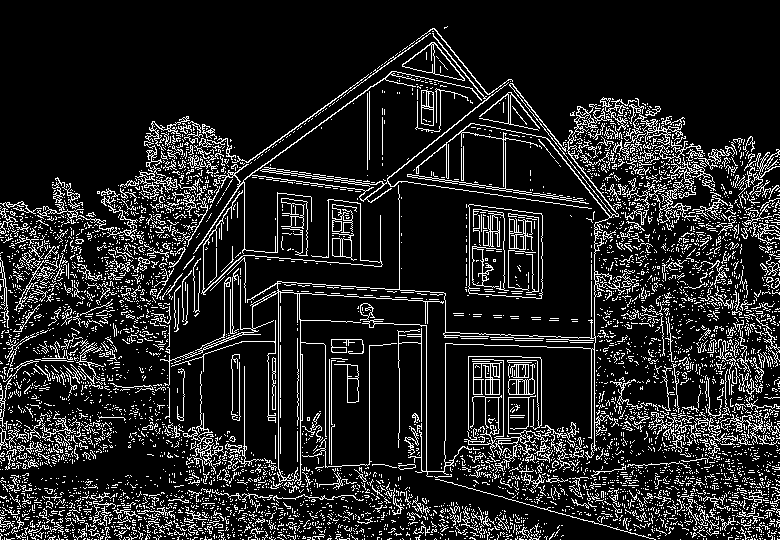

In [109]:
img = cv2.imread('image1.jpg')

# Resize image
img = cv2.resize(img, (780, 540),
               interpolation = cv2.INTER_LINEAR)

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image [Very Important preprocessing task]
# This will give a single-pixel thick edges
# Change the Lower and Upper thresholds and observe the changes
edges = cv2.Canny(gray, 110, 120, apertureSize=3)

cv2_imshow(edges)

**Descrption:** Apply the HT technique for Line detection.

## Task 3: Display Detected Straight Lines

By applying a threshold to the accumulator space, we extract the most significant lines and overlay them onto the input image.

## Task 3: Display Detected Straight Lines

After generating the accumulator space, we apply a threshold to extract the strongest line candidates. These lines are then drawn on the original image to visualize the results. Key steps include:
- Setting a threshold for peak detection in the accumulator space.
- Extracting line parameters (rho, theta) from the peaks.
- Drawing the detected lines on the original image.

By adjusting the threshold, we can control the trade-off between detecting more lines and avoiding false positives.

In [110]:
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 225)

In [111]:
lines.shape

(8, 1, 2)

In [112]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
lines = np.array(lines)

print(lines.shape)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


(8, 1, 2)


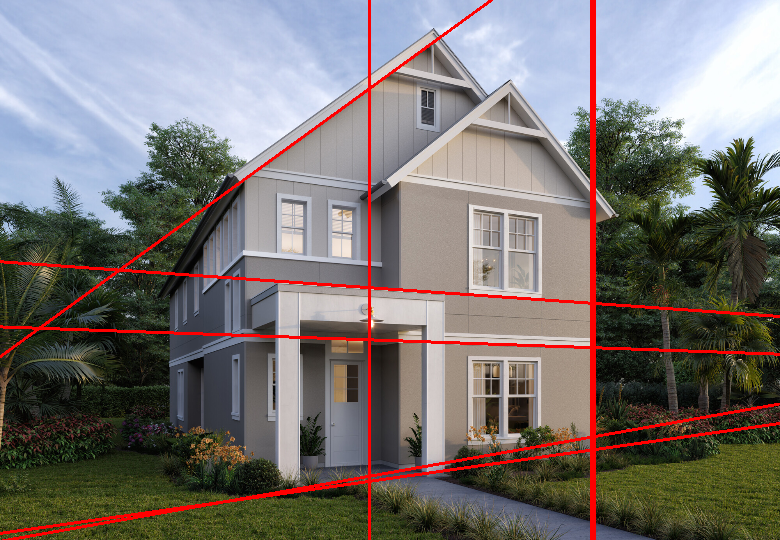

In [113]:
cv2_imshow(img)

`Task # 02 Generate the Hough/Accumulator Space using the rho-theta parameters.` **[Complete This Task]**

a. Vote in the parameter space.

b. Display the Hough/Accumulator space.

In [114]:
# Code here
from matplotlib import  pyplot as plt
# Initialize accumulator matrix
height, width = edges.shape
diag_len = int(np.sqrt(height**2 + width**2))
accumulator = np.zeros((2 * diag_len, 180), dtype=np.int32)

**Initialize Accumulator Matrix**:
   - `height` and `width` are extracted from the shape of the `edges` image (output from edge detection, e.g., Canny).
   - `diag_len` calculates the diagonal length of the image using the Pythagorean theorem (`np.sqrt(height**2 + width**2)`). This ensures the accumulator matrix is large enough to cover all possible lines in the image.
   - `accumulator` is initialized as a 2D NumPy array with dimensions `(2 * diag_len, 180)`. This matrix will store votes for lines in Hough space, where:
     - Rows represent the distance (`ρ`) from the origin (ranging from `-diag_len` to `diag_len`).
     - Columns represent the angle (`θ`) in degrees (ranging from `0` to `180`).

This accumulator matrix is used in the Hough Transform to detect lines by counting votes for potential lines in the image.

In [115]:
# Voting process in the accumulator space
y_idxs, x_idxs = np.nonzero(edges)

In [116]:
#Task-2 A
for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]
    for theta_idx in range(180):
        theta = theta_idx * np.pi / 180
        rho = int(x * np.cos(theta) + y * np.sin(theta)) + diag_len
        accumulator[rho, theta_idx] += 1

# Explanation of the Code (Task-2 A)

This code implements the **Hough Transform** to detect lines in an image. Here's a breakdown:

1. **Loop Through Edge Points**:
   - `x_idxs` and `y_idxs` are arrays containing the coordinates of edge pixels (e.g., from Canny edge detection).
   - The outer loop iterates over all edge points `(x, y)`.

2. **Loop Through Angles (`θ`)**:
   - The inner loop iterates over 180 angles (`theta_idx`), representing `θ` in degrees (from `0` to `179`).
   - `theta` is converted to radians for trigonometric calculations.

3. **Calculate Rho (`ρ`)**:
   - For each `(x, y)` and `θ`, the distance `ρ` is calculated using the line equation:
     ```
     ρ = x * cos(θ) + y * sin(θ)
     ```
   - `rho` is adjusted by adding `diag_len` to ensure it fits within the accumulator matrix (since `ρ` can be negative).

4. **Update Accumulator Matrix**:
   - The value at `accumulator[rho, theta_idx]` is incremented by 1. This represents a "vote" for the line defined by `(ρ, θ)`.

### Purpose:
- The accumulator matrix accumulates votes for potential lines in the image. Peaks in this matrix correspond to the most prominent lines.

### Key Points:
- **`x_idxs` and `y_idxs`**: Coordinates of edge pixels.
- **`theta_idx`**: Angle index (0 to 179 degrees).
- **`rho`**: Distance from the origin to the line.
- **`accumulator`**: Stores votes for lines in Hough space.



In [117]:
# Normalize accumulator for visualization
norm_accumulator = (accumulator - np.min(accumulator)) / (np.max(accumulator) - np.min(accumulator))
norm_accumulator = (accumulator * 255).astype(np.uint8)

### Purpose:
- Normalization ensures the accumulator matrix can be visualized as a grayscale image, where brighter pixels indicate higher vote counts (i.e., stronger evidence of lines).


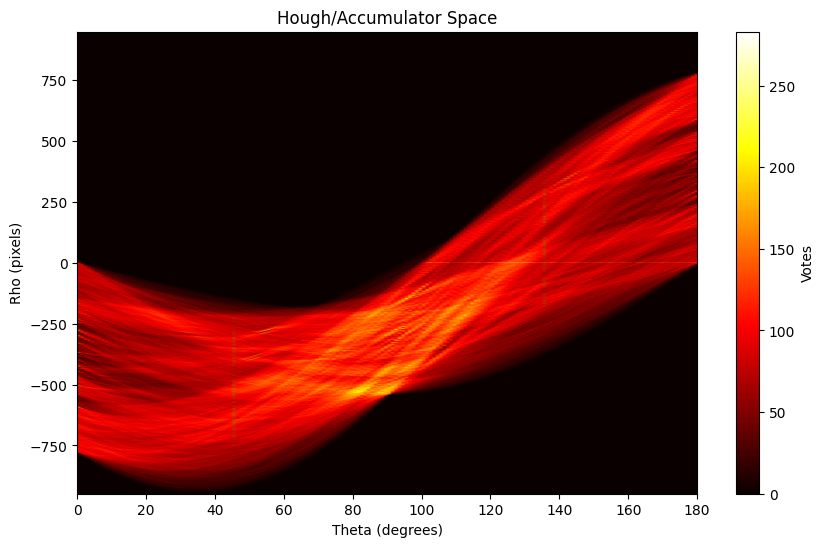

In [118]:
# Display the accumulator space
plt.figure(figsize=(10, 6))
plt.title("Hough/Accumulator Space")
plt.xlabel("Theta (degrees)")
plt.ylabel("Rho (pixels)")
plt.imshow(accumulator, cmap='hot', aspect='auto', extent=[0, 180, -diag_len, diag_len])
plt.colorbar(label='Votes')
plt.show()

`Task # 03 Display the detected straight lines` **[Home Assignment]**

a. Apply the Threshold on to the parameter space, and list the line parameters

b. Draw the lines on the input image.

In [119]:
# Apply a threshold to select strong votes
threshold =260  # Adjust as needed
lines = []
for rho in range(2 * diag_len):
    for theta in range(180):  # Theta is in degrees (0-179)
        if accumulator[rho, theta] >= threshold:
            actual_rho = rho - diag_len
            lines.append((actual_rho, np.deg2rad(theta)))

for rho, theta in lines:
  print(f"Line: rho={rho}, theta={theta}")

Line: rho=0, theta=2.199114857512855
Line: rho=0, theta=2.2165681500327987
Line: rho=276, theta=0.9424777960769379


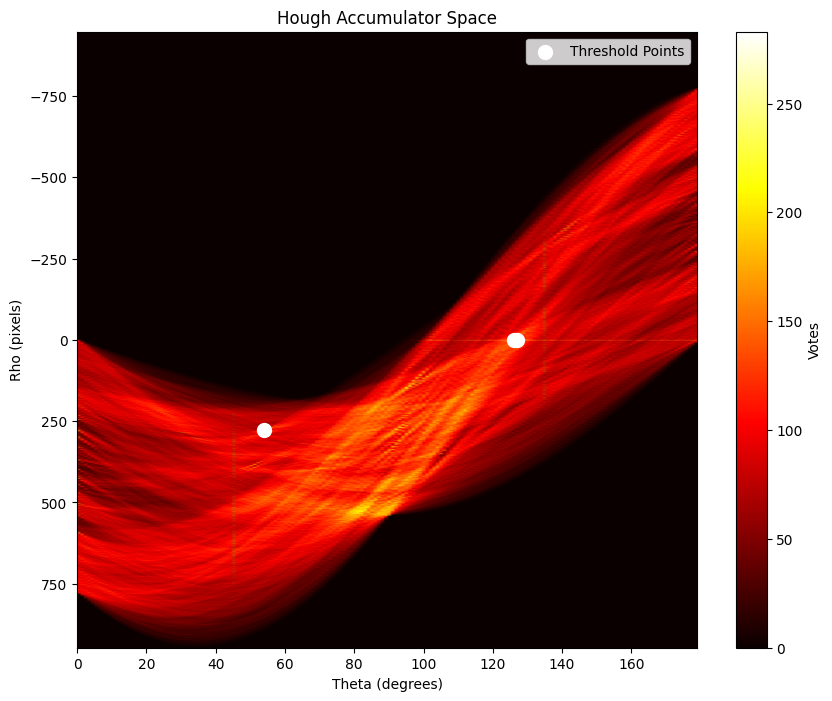

In [120]:
# Define theta_vals and rho_vals
theta_vals = np.deg2rad(np.arange(180))
rho_vals = np.arange(-diag_len, diag_len)
threshold_points = np.where(accumulator >= threshold)

# Display
plt.figure(figsize=(10, 8))
plt.imshow(accumulator, cmap='hot', aspect='auto',
           extent=[np.rad2deg(theta_vals[0]), np.rad2deg(theta_vals[-1]), rho_vals[-1], rho_vals[0]])
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (pixels)')
plt.title('Hough Accumulator Space')
plt.colorbar(label='Votes')

# Scatter plot for threshold points
plt.scatter(np.rad2deg(theta_vals[threshold_points[1]]),
            rho_vals[threshold_points[0]],
            color='White', marker='o', s=100, label='Threshold Points')

plt.legend()
plt.show()

### **Hough Accumulator Space (Rho-Theta Parameter Space)**

This plot represents the Hough Transform accumulator space, where detected lines in the image are mapped to (ρ, θ) coordinates.

- **X-axis (Theta in degrees)**: Angle of the detected lines (0° to 180°).
- **Y-axis (Rho in pixels)**: Perpendicular distance from the origin to the line.
- **Color Intensity**: Represents the number of votes received by each (ρ, θ) pair.
  - **Bright regions** indicate strong candidate lines.
  - **Dark regions** have fewer votes, representing weaker lines.

Peaks in this space correspond to prominent lines in the original image.



### **Processing and Drawing Hough Lines**

The following code takes the detected lines from the Hough Transform and draws them onto the original image.

#### **How It Works:**
1. Convert the detected `lines` into a NumPy array for easy manipulation.
2. Iterate through each detected line, extracting the parameters **rho (r)** and **theta**.
3. Compute the Cartesian coordinates from the polar representation:
   - Use **cos(theta)** and **sin(theta)** to get a point on the line.
   - Calculate two extreme points to extend the line across the image.
4. Use `cv2.line()` to draw the detected lines in **red (0, 0, 255)** with a thickness of **2 pixels**.
5. This visualization helps in identifying the prominent edges detected by the Hough Transform.


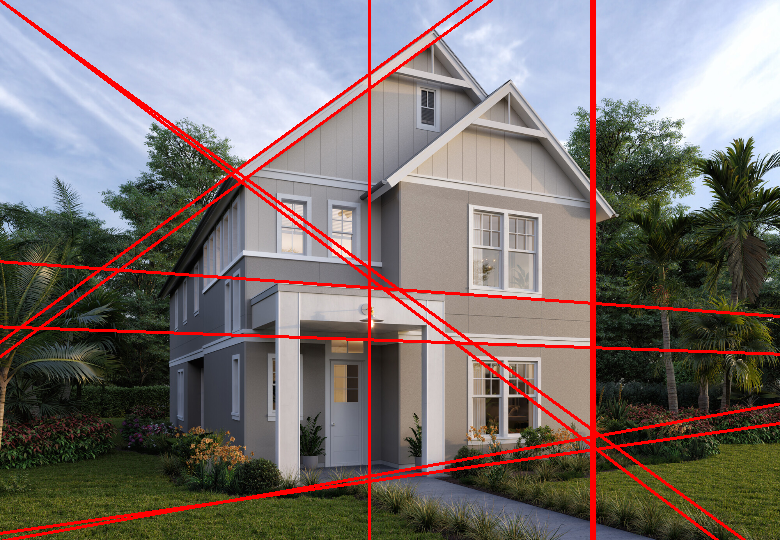

In [121]:
# Draw detected lines on the original image
for rho, theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show the final image with detected lines
cv2_imshow(img)

### **Detected Lines Using Hough Transform**

The image shows the application of the Hough Line Transform to detect dominant straight lines in the scene.

- **Red lines** represent the detected edges based on significant peaks in the Hough accumulator space.
- The detected lines converge toward a **vanishing point**, highlighting the perspective of the road.
- This technique is useful for **lane detection** and **structural analysis** in image processing.

The results demonstrate the effectiveness of the Hough Transform in detecting linear structures in real-world images.
